# Data Science and Visualization (RUC F2023)

## Lecture 4: Classification (I)

# Main Points:
 
* ## Decision Tree 
* ## Random Forest
* ## Precision, Recall and Accuracy
* ## Confusion Matrix

We use the diabetes dataset whose *Outcome* attribute captures the groundtruth class labels. There are only two labels, 1 (Yes) and 0 (No). Therefore, it is a binary classification problem.

## 0. Importing the Required Libraries

In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## 1. Loading the Data

In [5]:
data = pd.read_csv('C:\Data\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.shape

(768, 9)

## 2. Feature Selection

Let's first take a look at all columns' information:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We can get all column labels:

In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Apparently, the Outcome column contains the class label. So it should be excluded from the features. Let's also assume Age is not that relevant, so we also drop it from the feature columns.

In [9]:
feature_cols = data.columns.drop(['Age', 'Outcome'])
feature_cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction'],
      dtype='object')

Conventionaly, we use **X** to represent all data under the feature columns, and *y* the class label column in the data.

In [10]:
# Features
X = data[feature_cols]

# Target variable
y = data.Outcome 

## 3. Splitting the Data into Training and Test Dets

This is done by calling function train_test_split(.):

Input:
* test_size: The percentage of data used for testing.

Output:
* X_train: Features of the training data
* X_test: Features of the test data
* y_train: Class labels of the training data 
* y_test: Class labels (**groundtruth**) of the test data

In [16]:
# In this case: 70% training and 30% test
# If you use the same value for random_state in two different runs, you will get the data split in the same way.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Note that X_train and y_train correspond to each other in the original data:

In [12]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
88,15,136,70,32,110,37.1,0.153
467,0,97,64,36,100,36.8,0.600
550,1,116,70,28,0,27.4,0.204
147,2,106,64,35,119,30.5,1.400
481,0,123,88,37,0,35.2,0.197


In [13]:
y_train.head()

88     1
467    0
550    0
147    0
481    0
Name: Outcome, dtype: int64

And so do X_test and y_test:

In [14]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
285,7,136,74,26,135,26.0,0.647
101,1,151,60,0,0,26.1,0.179
581,6,109,60,27,0,25.0,0.206
352,3,61,82,28,0,34.4,0.243
726,1,116,78,29,180,36.1,0.496


In [15]:
y_test.head()

285    0
101    0
581    0
352    0
726    0
Name: Outcome, dtype: int64

## 4. Building a Decision Tree Model

Let's create a Decision Tree Model using Scikit-learn. We give no arguments, which means a default tree is built.

In [17]:
dtree = DecisionTreeClassifier()

But now the decision tree model (classifier) is empty, it has seen no training data and cannot do anything good for us.

We need to train this decision tree, by **'fitting'** the empty model to the available training data. This is done by calling the **fit()** function:

In [18]:
dtree = dtree.fit(X_train, y_train)

Now we can apply the decision tree classifier to the test data, by calling the **predict()** function:

In [19]:
y_pred = dtree.predict(X_test)

Let's take a look at the predicted result:

In [20]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

How does the predicted result align with the groundtruth in y_test?

In [21]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

## 5. Evaluating the Model

Let's measure how accurately the classifier or model can predict the type of cultivars.

**Accuracy** can be computed by comparing actual test set values and predicted values.

In [22]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.645021645021645


**Recall** for the class label 1:

In [23]:
print("Recall:", metrics.recall_score(y_test, y_pred))

Recall: 0.5294117647058824


**Precision** for the class label 1:

In [24]:
print("Precision:", metrics.precision_score(y_test, y_pred))

Precision: 0.5172413793103449


### Confusion matrix

The original, plain confusion matrix:

In [25]:
metrics.confusion_matrix(y_test.values, y_pred)

array([[104,  42],
       [ 40,  45]], dtype=int64)

We can also plot the confusion matrix:

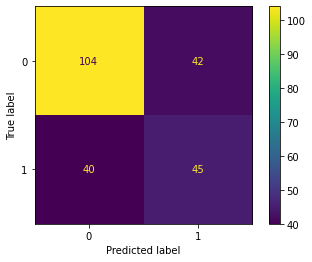

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dtree, X_test, y_test)
plt.show()

#### Normalize the confusion matrix over all.

What is the ratio of each cell over all?

The sum of the digonal is *accuracy*.

In [27]:
metrics.confusion_matrix(y_test.values, y_pred, normalize='all')

array([[0.45021645, 0.18181818],
       [0.17316017, 0.19480519]])

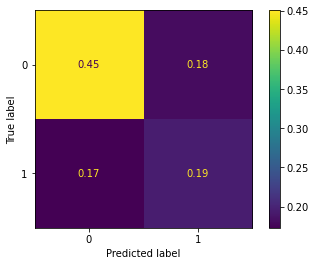

In [28]:
plot_confusion_matrix(dtree, X_test, y_test, normalize='all')
plt.show()

#### Normalize the confusion matrix over the groundtruth (rows).

How much of the groundtruth is classfiied correct for each label?

A ratio in the digonal is *recall* for the corresponding class label.

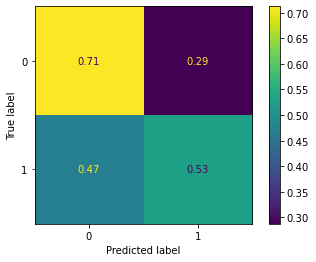

In [29]:
plot_confusion_matrix(dtree, X_test, y_test, normalize='true')
plt.show()

In [30]:
metrics.confusion_matrix(y_test.values, y_pred, normalize='true')

array([[0.71232877, 0.28767123],
       [0.47058824, 0.52941176]])

#### Normalize over the predicted (column).

How many of the predicted labels are correct?

A ratio in the digonal is *precision* for the corresponding class label.

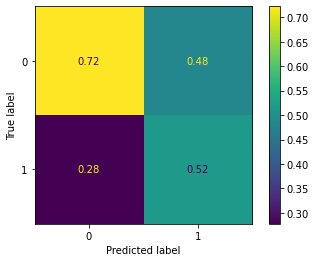

In [31]:
plot_confusion_matrix(dtree, X_test, y_test, normalize='pred')
plt.show()

In [32]:
metrics.confusion_matrix(y_test.values, y_pred, normalize='pred')

array([[0.72222222, 0.48275862],
       [0.27777778, 0.51724138]])

## 6. Visualizing Decision Trees (Optional)

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.

* pip install graphviz

* pip install pydotplus

**export_graphviz** function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

In [33]:
feature_cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction'],
      dtype='object')

In [34]:
dtree.classes_

array([0, 1], dtype=int64)

[Text(178.68060297356828, 210.192, 'X[1] <= 129.5\ngini = 0.449\nsamples = 537\nvalue = [354, 183]'),
 Text(88.14771475770925, 195.696, 'X[5] <= 26.3\ngini = 0.329\nsamples = 357\nvalue = [283, 74]'),
 Text(33.73810572687225, 181.2, 'X[5] <= 9.1\ngini = 0.06\nsamples = 97\nvalue = [94, 3]'),
 Text(27.83854625550661, 166.704, 'X[1] <= 114.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(24.88876651982379, 152.208, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(30.788325991189428, 152.208, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(39.63766519823789, 166.704, 'X[6] <= 0.669\ngini = 0.022\nsamples = 91\nvalue = [90, 1]'),
 Text(36.687885462555066, 152.208, 'gini = 0.0\nsamples = 76\nvalue = [76, 0]'),
 Text(42.58744493392071, 152.208, 'X[6] <= 0.705\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(39.63766519823789, 137.712, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(45.537224669603525, 137.712, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(142.55732378854

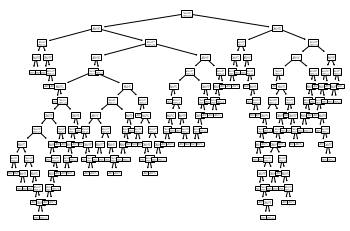

In [35]:
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

# Export each tree into a .dot file
#file_path_name = "{0}-{1}.png".format(c, md)
export_graphviz(dtree, out_file='diabetes_dt.dot', 
                #class_names=True, 
                class_names=['Negative', 'Positive'], 
                feature_names=feature_cols,
                impurity=False,
                filled=True)
        
tree.plot_tree(dtree)

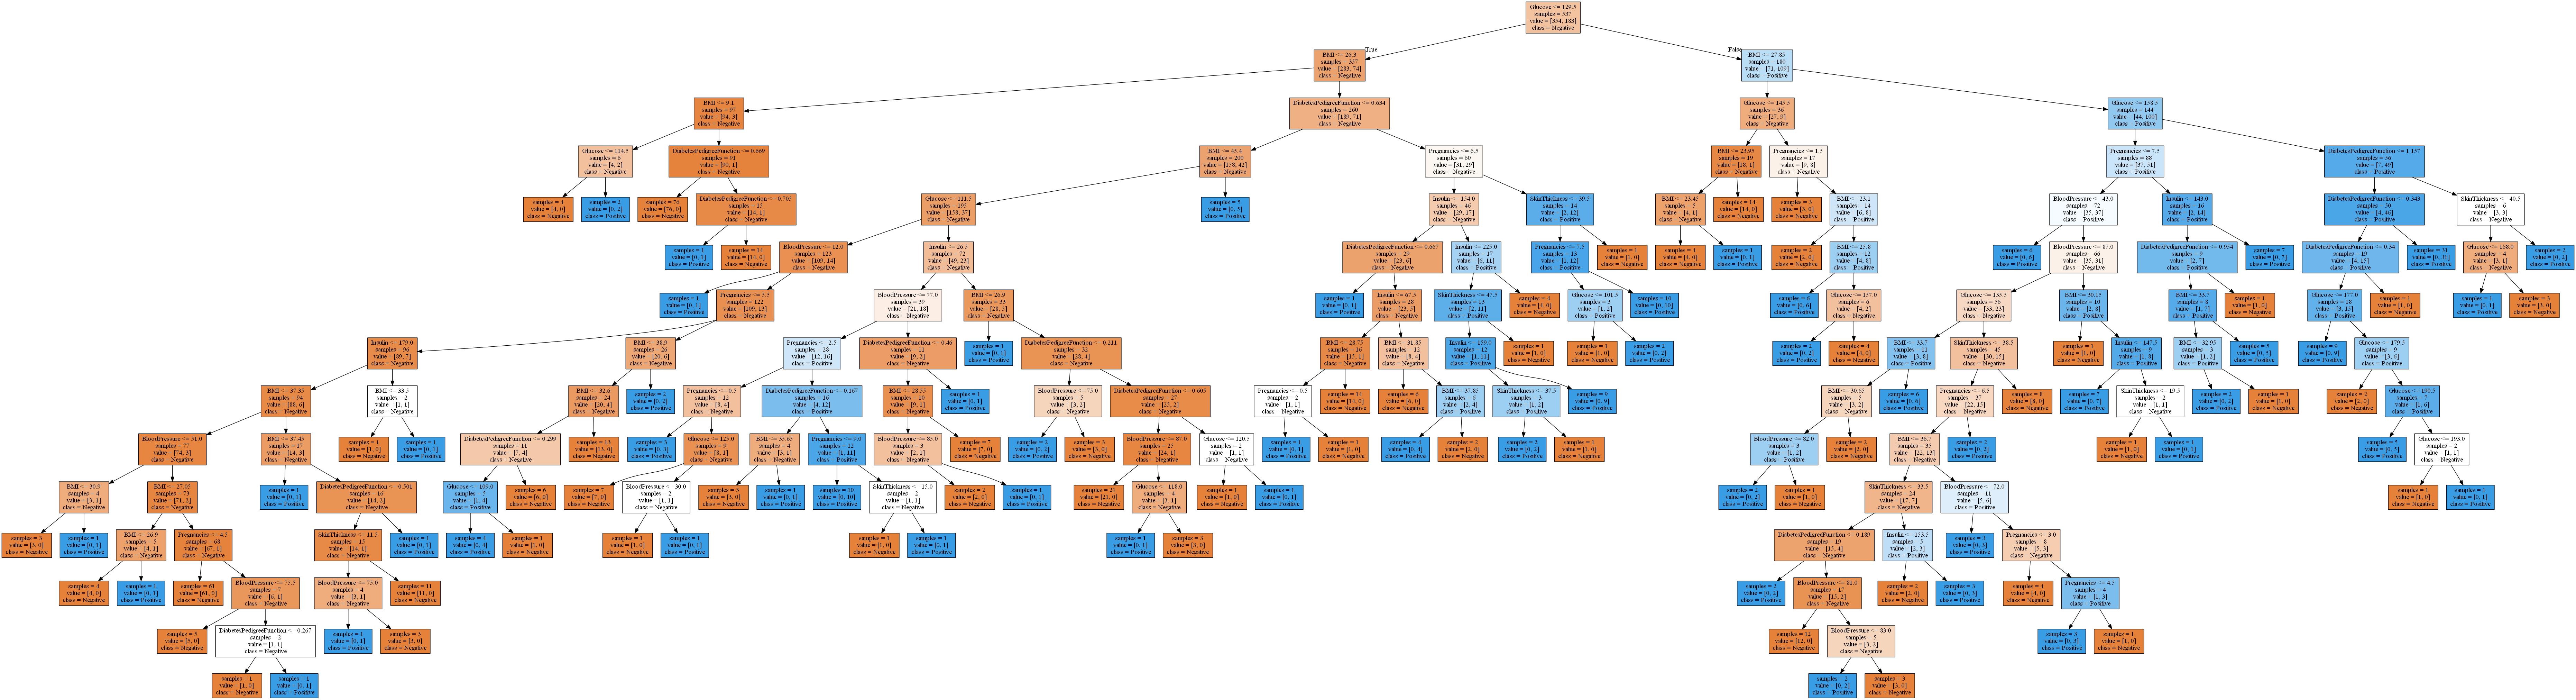

In [36]:
! dot -Tpng diabetes_dt.dot -o diabetes_dt.png

from IPython import display
display.Image("diabetes_dt.png")

In [37]:
import graphviz

with open('diabetes_dt.dot') as f:
    tree_graph = f.read()

graph = graphviz.Source(tree_graph)
# This render the .dot file into a PDF
graph.render("diabetes_dt", view=True)

'diabetes_dt.pdf'

## 7. Optimizing Decision Trees

When contructing a decision tree, we can control how it is constructed in the following aspects:
* **criterion**: Measure of the quality of a split of a column. Mainly *gini* and *entropy*
* **splitter**: Splitting strategy, *best* or *random*
* **max_depth**: The maximum depth of the tree

In the following example, we generate multiple decision trees by giving different arguments for **criterion** and **max_depth**. We have the same training/test datasets. We observe the accuracy of each specific decision tree.

In [38]:
criteria = ['gini', 'entropy']
for c in criteria:
    for md in range(2, 8):
        # Model intializing
        dtree = DecisionTreeClassifier(criterion=c, max_depth=md)
        
        # Model training/fitting
        dtree.fit(X_train, y_train)
        
       
        # Model validation/test
        y_pred = dtree.predict(X_test)
        
        print("criterion={0}, max_depth={1}:\r".format(c, md))

        # sklearn.metrics.accuracy_score returns the accuracy for the current model
        print("Accuracy: {}\r\n".format(metrics.accuracy_score(y_test, y_pred)))


criterion=gini, max_depth=2:
Accuracy: 0.7575757575757576

criterion=gini, max_depth=3:
Accuracy: 0.7575757575757576

criterion=gini, max_depth=4:
Accuracy: 0.7575757575757576

criterion=gini, max_depth=5:
Accuracy: 0.7445887445887446

criterion=gini, max_depth=6:
Accuracy: 0.7229437229437229

criterion=gini, max_depth=7:
Accuracy: 0.7142857142857143

criterion=entropy, max_depth=2:
Accuracy: 0.7705627705627706

criterion=entropy, max_depth=3:
Accuracy: 0.7705627705627706

criterion=entropy, max_depth=4:
Accuracy: 0.7662337662337663

criterion=entropy, max_depth=5:
Accuracy: 0.7272727272727273

criterion=entropy, max_depth=6:
Accuracy: 0.7662337662337663

criterion=entropy, max_depth=7:
Accuracy: 0.7056277056277056



As a matter of fact, we can make use of many decision trees to improve the prediction accuracy. This apporach is called **Random Forest** (of decision trees).

## 8. Random Forest

class **sklearn.ensemble.RandomForestClassifier**(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

* n_estimators: The number of trees

In [39]:
from sklearn.ensemble import RandomForestClassifier

#criterion='entropy', max_features=5, n_estimators=100, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0) 
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print("Accuracy of Random Forest: {}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of Random Forest: 0.7835497835497836


For a random forest and a decision tree, the features are of different degrees of importance:

In [51]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances(model, features):
    n_features = len(features)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

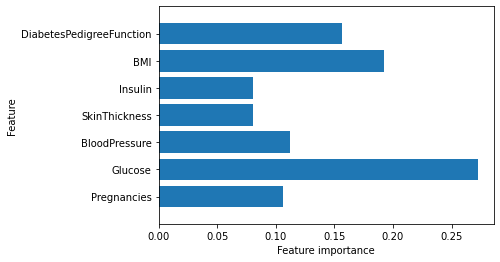

In [52]:
plot_feature_importances(forest, feature_cols)

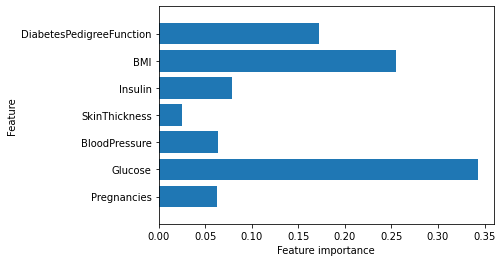

In [53]:
plot_feature_importances(dtree, feature_cols)

If we want to 'sort' the bars, we can use the following function:

In [78]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_sorted(model, features):
    importance_series = pd.Series(model.feature_importances_, index=features)
    importance_series = importance_series.sort_values()
    plt.barh(importance_series.index, importance_series.values, align='center')
        
    n_features = len(features)
    plt.yticks(np.arange(n_features), importance_series.index)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

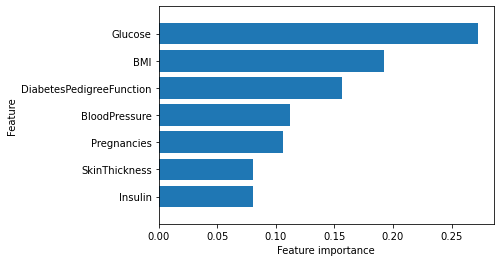

In [79]:
plot_feature_importances_sorted(forest, feature_cols)

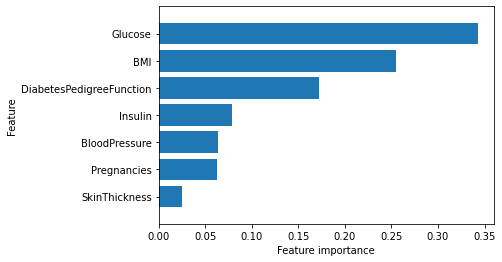

In [80]:
plot_feature_importances_sorted(dtree, feature_cols)

### Documentations

* DecisionTreeClassifier https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* RandomForestClassifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html